# UTSA CS 4973/5483: Assignment-1

Spring 2021


**Perez - Aaron - (tle728)**





## Learning Objectives


*   Understand the process of image filtering. Create different filters and apply them on images.
*   Implement the operation of blending two images using Laplacian Pyramid.


In [34]:
# Add only your imports here
import sys
import os
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
import scipy.signal
from IPython.display import Image

#Filtering

##Create own filtering function (45 points)

Write a function that performs filtering of an image given a kernel of size NxM, where N and M are both odd.

Padding - implement the mirror technique to avoid the loss of pixels on the image boundary.


##Create filter kernels and perform filtering (15 points)

Use the above created function on a given set of images. Create a kernel for the each of the following filters and perform filtering. Compare the filtered image with the openCV's filter2D function by drawing them side-by-side. Do this for all the non-mask images and plot them in a separate row. Grid size for each filter will be 3 columns (left - your result, middle - original image, right - openCV result) x 6 rows (number of images).

Create a new code block for the following:

*   Gaussian blur filter
*   Box blur filter
*   Sharpening filter
*   Sobel Horizontal filter
*   Sobel Vertical filter




In [35]:
# Create your own filtering function
def load_image(image_path):
    # Create the Image directory to save any plots
    if not os.path.exists(IMAGES_PATH): #We will output the results in image folder
        os.makedirs(IMAGES_PATH) # https://stackoverflow.com/questions/30230592/loading-all-images-using-imread-from-a-given-folder
    coloured_image = cv2.imread(image_path) # Reads the image in
    grey_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)
    print('Matrix size: ', grey_image.shape)
    return grey_image

def convolve2d(image, kernel):
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output or output placeholder
    output = np.zeros_like(image)
    # save image and kernel shapes, respectively
    (image_height, image_width) = image.shape[:2]
    (kernel_height, kernel_width) = kernel.shape[:2]
    # Sad padding attempt
    vertical_pad = (kernel_height-1)/2
    horizontal_pad = (kernel_width-1)/2
    # Mirror padding
    image_padded = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_REFLECT)
    # loop over the input image, "sliding" the kernel across
    # each (x, y)-coordinate from left-to-right and top to
    # bottom
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # extract the ROI of the image by extracting the
            # *center* region of the current (x, y)-coordinates
            # dimensions
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()

    return output


Matrix size:  (337, 515)


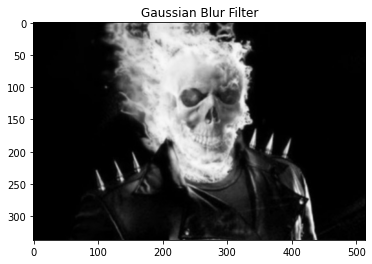

In [36]:
# Gaussian Blur Filter
IMAGES_PATH = 'images/'
input_image = load_image('ghost-rider.jpg')
imagegaussianblur = convolve2d(input_image, kernel=np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16.0)
cv2.imwrite(IMAGES_PATH + 'gaussian_blur.jpg', imagegaussianblur)
plt.figure(1)
plt.imshow(cv2.imread('./images/gaussian_blur.jpg')), plt.title('Gaussian Blur Filter')
plt.show() # RAW



Matrix size:  (350, 700)


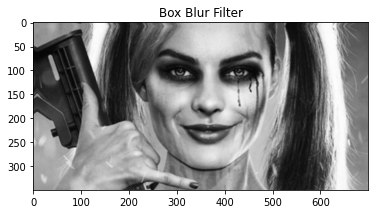

In [37]:
# Box Blur Filter
input_image = load_image('quinn.jpg')
boxblur = convolve2d(input_image, kernel=np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0)
cv2.imwrite(IMAGES_PATH + 'boxblur_image.jpg', boxblur)
plt.imshow(cv2.imread('./images/boxblur_image.jpg')), plt.title('Box Blur Filter')
plt.show()

Matrix size:  (350, 700)


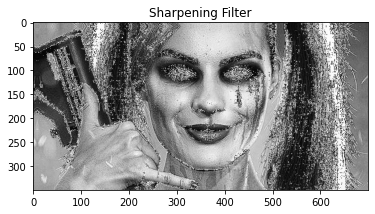

In [38]:
# Sharpening Filter
input_image = load_image('quinn.jpg')
image_sharpen = convolve2d(input_image, kernel=np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]]))
cv2.imwrite(IMAGES_PATH + 'sharpened_image.jpg', image_sharpen)
plt.imshow(cv2.imread('./images/sharpened_image.jpg')), plt.title('Sharpening Filter')
plt.show()

Matrix size:  (350, 700)


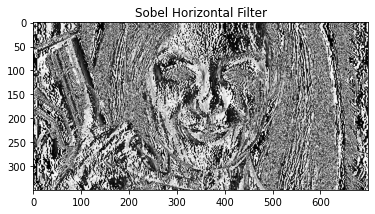

In [40]:
# Sobel Horizontal Filter
# I followed
# https://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm
# To help
input_image = load_image('quinn.jpg')
SobelHorizontal = convolve2d(input_image, kernel=np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]))
cv2.imwrite(IMAGES_PATH + 'sobelx_image.jpg', SobelHorizontal)
plt.imshow(cv2.imread('./images/sobelx_image.jpg')), plt.title('Sobel Horizontal Filter')
plt.show()

Matrix size:  (350, 700)


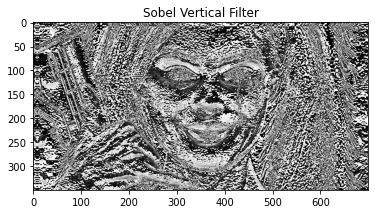

In [41]:
# Sobel Vertical Filter
# I followed
# https://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm
# To help
input_image = load_image('quinn.jpg')
SobelVertical = convolve2d(input_image, kernel=np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]]))
cv2.imwrite(IMAGES_PATH + 'sobely_image.jpg', SobelVertical)
plt.imshow(cv2.imread('./images/sobely_image.jpg')), plt.title('Sobel Vertical Filter')
plt.show()

# Blending

##Create own function for blending two images (50 points)

Implement a function that blends two given images using the Laplacian Image Pyramid and returns the resultant blended image. Please look at the class slides for the algorithm and the corresponding recorded video for explanation. 

In the lecture, we used left half from image-1 and right half from image-2. Instead, you should use a mask (black/white image) during the merge step. Black indicates take the pixels from image-1 and white indicates take the pixel from image-2.

Your function should take as input 2 images and an option to decide on the number of levels for Laplacian Pyramid. Assume that the images are of the same size.


##Perform blending for give image pairs (15 points)

Apply the above created function on all (3) pairs of images and show the results.

1.   soccerball & baseball
2.   ghost-rider & nicolas-cage
3.   quinn & robbie

As part of your results, you should show the Gaussian Pyramid, Laplacian Pyramid for each of the images in the image pair. You should also show the blend results at each level. Check the lecture slides for the results of the pair "apple & orange". You can show more intermediate results if you would like.



In [42]:
# Create your own function for blending two images
def split_rgb(image):
    red = None
    green = None
    blue = None
    (blue, green, red) = cv2.split(image)
    return red, green, blue

def generatingKernel(parameter):
    kernel = np.array([0.25 - parameter / 2.0, 0.25, parameter,
                     0.25, 0.25 - parameter /2.0])
    return np.outer(kernel, kernel)

def reduce(image):
    # Convolve image w/ kernek for gaussian smoothing
    kernel = generatingKernel(0.4)
    convolved = scipy.signal.convolve2d(image, kernel, mode='same')
    # Subsample w/ numpy to take every other row/col
    reduced = convolved[::2, ::2]
    return reduced

def expand(image):
    #Image x2 time size of input
    upsampled = np.zeros((2*len(image), 2*len(image[0])))
    
    # Assign every other row/col of input to output
    upsampled[::2, ::2] = image
    
    # Convolve image w/ kernek for gaussian smoothing
    kernel = generatingKernel(0.4)
    convolved = scipy.signal.convolve2d(upsampled, kernel, mode='same')
    
    # Multiply output by 4 to scale image back up
    expanded = convolved*4
    return expanded
    

def gaussPyramid(image, levels):
    # Iterate call the reduce func to build a pyramid
    output = [image]
    for i in range(0, levels):
        output.append(reduce(output[i]))
    return output
    
def lapPyramid(gaussPyr):
    # Iterate over gauss pyramid levels
    output = []
    k = len(gaussPyr)
    for i in range(0, k-1):
        gu = gaussPyr[i]
        # Expand lower level of pyramid
        egu = expand(gaussPyr[i+1])
        # Crop expanded image if wrong target dimensions
        if egu.shape[0] > gu.shape[0]:
            egu = np.delete(egu, (-1), axis=0)
        if egu.shape[1] > gu.shape[1]:
            egu = np.delete(egu, (-1), axis=1)
        #print(expanded)
        # Calculate laplacian pyramid
        output.append(gu- egu)
        
    # Last element of lap pyr is identical to input
    output.append(gaussPyr.pop())
    return output

def blend(laplPyrWhite, laplPyrBlack, gaussPyrMask):
    # Iterate over each level to calculate the blended pyramid 
    blended_pyr = []
    k = len(gaussPyrMask)
    for i in range(0, k):
        p1= gaussPyrMask[i]*laplPyrWhite[i]
        p2=(1 - gaussPyrMask[i])*laplPyrBlack[i]
        blended_pyr.append(p1 + p2)
        
    return blended_pyr

def collapse(pyramid):
    # Iterate over pyramid levels starting from smallest (in reverse)
    output = pyramid[len(pyramid)-1]
    for i in range(len(pyramid)-1, 0, -1):
        #Expand smaller level to next level 
        expanded = expand(output)
        
        #Crop expanded image if wrong target dimensions 
        if (len(expanded) != len(pyramid[i-1])):
            expanded = expanded[0:len(pyramid[i-1]), :] 
        if (len(expanded[0]) != len(pyramid[i-1][0])): 
            expanded = expanded[:, 0:len(pyramid[i-1][0])]
            
        #Flatten expanded onto next level 
        output = expanded + pyramid[i - 1]
        
    return output



We're done


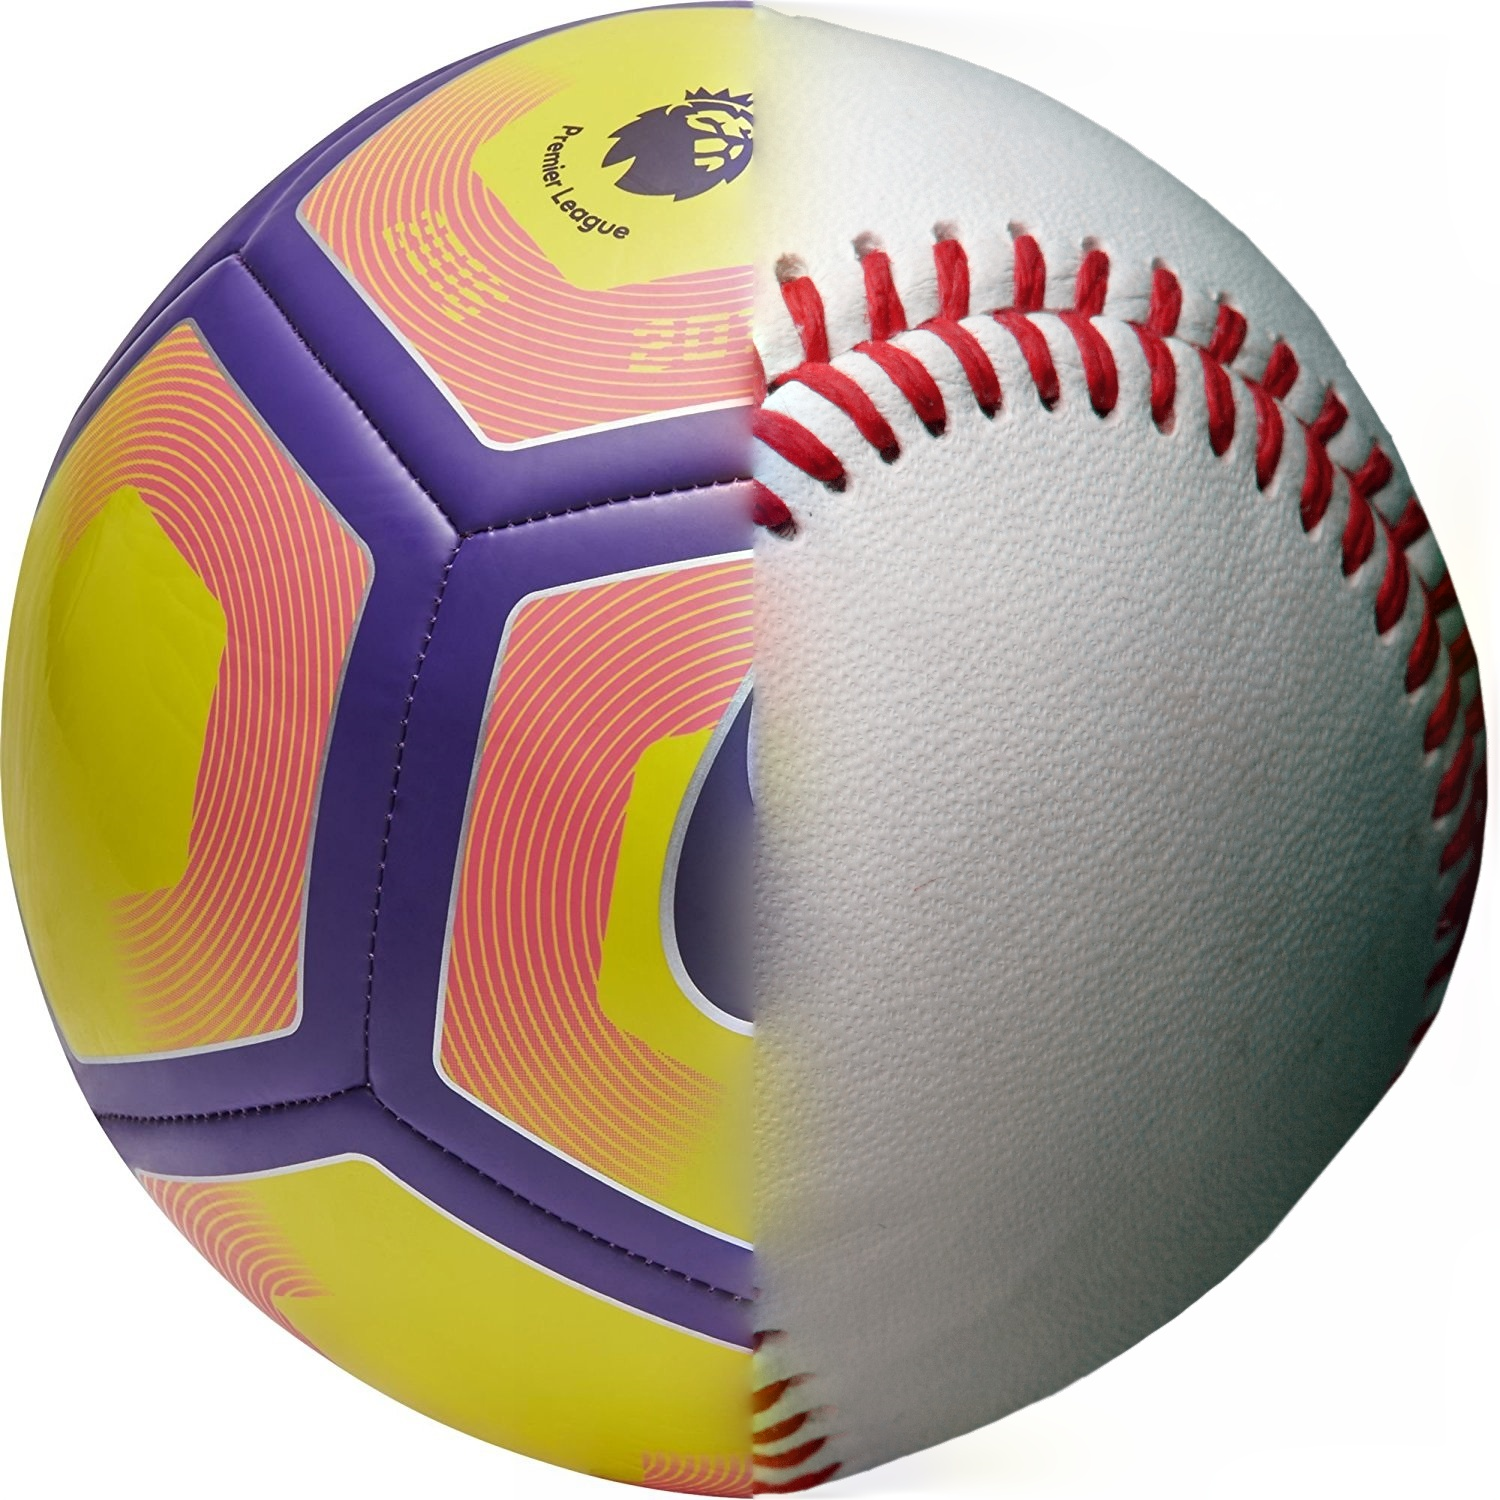

In [43]:
# Apply the above created function on all (3) pairs of images and show the results
image1 = cv2.imread('./soccerball.jpg')
image2 = cv2.imread('./baseball.png')
mask = cv2.imread('./soccerball-baseball-mask.png')
r1= None
g1= None
b1= None
r2= None
g2= None
b2= None
rm= None
gm = None
bm = None

(r1,g1,b1) = split_rgb(image1)
(r2,g2,b2) = split_rgb(image2)
(rm,gm,bm) = split_rgb(mask)

r1 = r1.astype(float)
g1 = g1.astype(float)
b1 = b1.astype(float)

r2 = r2.astype(float)
g2 = g2.astype(float)
b2 = b2.astype(float)

rm = rm.astype(float)/255
gm = gm.astype(float)/255
bm = bm.astype(float)/255

# Automatically figure out the size
min_size = min(r1.shape)
depth = int(math.floor(math.log(min_size, 2))) - 4 # at least 16x16 at the highest level.

gauss_pyr_maskr = gaussPyramid(rm, depth)
gauss_pyr_maskg = gaussPyramid(gm, depth)
gauss_pyr_maskb = gaussPyramid(bm, depth)

gauss_pyr_image1r = gaussPyramid(r1, depth)
gauss_pyr_image1g = gaussPyramid(g1, depth)
gauss_pyr_image1b = gaussPyramid(b1, depth)
 
gauss_pyr_image2r = gaussPyramid(r2, depth)
gauss_pyr_image2g = gaussPyramid(g2, depth)
gauss_pyr_image2b = gaussPyramid(b2, depth)
 
lapl_pyr_image1r  = lapPyramid(gauss_pyr_image1r)
lapl_pyr_image1g  = lapPyramid(gauss_pyr_image1g)
lapl_pyr_image1b  = lapPyramid(gauss_pyr_image1b)
 
lapl_pyr_image2r = lapPyramid(gauss_pyr_image2r)
lapl_pyr_image2g = lapPyramid(gauss_pyr_image2g)
lapl_pyr_image2b = lapPyramid(gauss_pyr_image2b)

outpyrr = blend(lapl_pyr_image2r, lapl_pyr_image1r, gauss_pyr_maskr)
outpyrg = blend(lapl_pyr_image2g, lapl_pyr_image1g, gauss_pyr_maskg)
outpyrb = blend(lapl_pyr_image2b, lapl_pyr_image1b, gauss_pyr_maskb)
 
outimgr = collapse(blend(lapl_pyr_image2r, lapl_pyr_image1r, gauss_pyr_maskr))
outimgg = collapse(blend(lapl_pyr_image2g, lapl_pyr_image1g, gauss_pyr_maskg))
outimgb = collapse(blend(lapl_pyr_image2b, lapl_pyr_image1b, gauss_pyr_maskb))
# blending sometimes results in slightly out of bound numbers.
outimgr[outimgr < 0] = 0
outimgr[outimgr > 255] = 255
outimgr = outimgr.astype(np.uint8)
 
outimgg[outimgg < 0] = 0
outimgg[outimgg > 255] = 255
outimgg = outimgg.astype(np.uint8)
 
outimgb[outimgb < 0] = 0
outimgb[outimgb > 255] = 255
outimgb = outimgb.astype(np.uint8)
 
result = np.zeros(image1.shape,dtype=image1.dtype)
tmp = []
tmp.append(outimgb)
tmp.append(outimgg)
tmp.append(outimgr)
result = cv2.merge(tmp,result)
cv2.imwrite('./blendedimage1.jpg', result)

################## OPERATION 2

image1 = cv2.imread('./ghost-rider.jpg')
image2 = cv2.imread('./nicolas-cage.jpg')
mask = cv2.imread('./ghost-rider-nicolas-cage-mask.jpg')
r1= None
g1= None
b1= None
r2= None
g2= None
b2= None
rm= None
gm = None
bm = None

(r1,g1,b1) = split_rgb(image1)
(r2,g2,b2) = split_rgb(image2)
(rm,gm,bm) = split_rgb(mask)

r1 = r1.astype(float)
g1 = g1.astype(float)
b1 = b1.astype(float)

r2 = r2.astype(float)
g2 = g2.astype(float)
b2 = b2.astype(float)

rm = rm.astype(float)/255
gm = gm.astype(float)/255
bm = bm.astype(float)/255

# Automatically figure out the size
min_size = min(r1.shape)
depth = int(math.floor(math.log(min_size, 2))) - 4 # at least 16x16 at the highest level.

gauss_pyr_maskr = gaussPyramid(rm, depth)
gauss_pyr_maskg = gaussPyramid(gm, depth)
gauss_pyr_maskb = gaussPyramid(bm, depth)

gauss_pyr_image1r = gaussPyramid(r1, depth)
gauss_pyr_image1g = gaussPyramid(g1, depth)
gauss_pyr_image1b = gaussPyramid(b1, depth)
 
gauss_pyr_image2r = gaussPyramid(r2, depth)
gauss_pyr_image2g = gaussPyramid(g2, depth)
gauss_pyr_image2b = gaussPyramid(b2, depth)
 
lapl_pyr_image1r  = lapPyramid(gauss_pyr_image1r)
lapl_pyr_image1g  = lapPyramid(gauss_pyr_image1g)
lapl_pyr_image1b  = lapPyramid(gauss_pyr_image1b)
 
lapl_pyr_image2r = lapPyramid(gauss_pyr_image2r)
lapl_pyr_image2g = lapPyramid(gauss_pyr_image2g)
lapl_pyr_image2b = lapPyramid(gauss_pyr_image2b)

outpyrr = blend(lapl_pyr_image2r, lapl_pyr_image1r, gauss_pyr_maskr)
outpyrg = blend(lapl_pyr_image2g, lapl_pyr_image1g, gauss_pyr_maskg)
outpyrb = blend(lapl_pyr_image2b, lapl_pyr_image1b, gauss_pyr_maskb)
 
outimgr = collapse(blend(lapl_pyr_image2r, lapl_pyr_image1r, gauss_pyr_maskr))
outimgg = collapse(blend(lapl_pyr_image2g, lapl_pyr_image1g, gauss_pyr_maskg))
outimgb = collapse(blend(lapl_pyr_image2b, lapl_pyr_image1b, gauss_pyr_maskb))
# blending sometimes results in slightly out of bound numbers.
outimgr[outimgr < 0] = 0
outimgr[outimgr > 255] = 255
outimgr = outimgr.astype(np.uint8)
 
outimgg[outimgg < 0] = 0
outimgg[outimgg > 255] = 255
outimgg = outimgg.astype(np.uint8)
 
outimgb[outimgb < 0] = 0
outimgb[outimgb > 255] = 255
outimgb = outimgb.astype(np.uint8)
 
result = np.zeros(image1.shape,dtype=image1.dtype)
tmp = []
tmp.append(outimgb)
tmp.append(outimgg)
tmp.append(outimgr)
result = cv2.merge(tmp,result)
cv2.imwrite('./blendedimage2.jpg', result)


################## OPERATION 3

image1 = cv2.imread('./quinn.jpg')
image2 = cv2.imread('./robbie.jpg')
mask = cv2.imread('./quinn-robbie-mask.jpg')
r1= None
g1= None
b1= None
r2= None
g2= None
b2= None
rm= None
gm = None
bm = None

(r1,g1,b1) = split_rgb(image1)
(r2,g2,b2) = split_rgb(image2)
(rm,gm,bm) = split_rgb(mask)

r1 = r1.astype(float)
g1 = g1.astype(float)
b1 = b1.astype(float)

r2 = r2.astype(float)
g2 = g2.astype(float)
b2 = b2.astype(float)

rm = rm.astype(float)/255
gm = gm.astype(float)/255
bm = bm.astype(float)/255

# Automatically figure out the size
min_size = min(r1.shape)
depth = int(math.floor(math.log(min_size, 2))) - 4 # at least 16x16 at the highest level.

gauss_pyr_maskr = gaussPyramid(rm, depth)
gauss_pyr_maskg = gaussPyramid(gm, depth)
gauss_pyr_maskb = gaussPyramid(bm, depth)

gauss_pyr_image1r = gaussPyramid(r1, depth)
gauss_pyr_image1g = gaussPyramid(g1, depth)
gauss_pyr_image1b = gaussPyramid(b1, depth)
 
gauss_pyr_image2r = gaussPyramid(r2, depth)
gauss_pyr_image2g = gaussPyramid(g2, depth)
gauss_pyr_image2b = gaussPyramid(b2, depth)
 
lapl_pyr_image1r  = lapPyramid(gauss_pyr_image1r)
lapl_pyr_image1g  = lapPyramid(gauss_pyr_image1g)
lapl_pyr_image1b  = lapPyramid(gauss_pyr_image1b)
 
lapl_pyr_image2r = lapPyramid(gauss_pyr_image2r)
lapl_pyr_image2g = lapPyramid(gauss_pyr_image2g)
lapl_pyr_image2b = lapPyramid(gauss_pyr_image2b)

outpyrr = blend(lapl_pyr_image2r, lapl_pyr_image1r, gauss_pyr_maskr)
outpyrg = blend(lapl_pyr_image2g, lapl_pyr_image1g, gauss_pyr_maskg)
outpyrb = blend(lapl_pyr_image2b, lapl_pyr_image1b, gauss_pyr_maskb)
 
outimgr = collapse(blend(lapl_pyr_image2r, lapl_pyr_image1r, gauss_pyr_maskr))
outimgg = collapse(blend(lapl_pyr_image2g, lapl_pyr_image1g, gauss_pyr_maskg))
outimgb = collapse(blend(lapl_pyr_image2b, lapl_pyr_image1b, gauss_pyr_maskb))
# blending sometimes results in slightly out of bound numbers.
outimgr[outimgr < 0] = 0
outimgr[outimgr > 255] = 255
outimgr = outimgr.astype(np.uint8)
 
outimgg[outimgg < 0] = 0
outimgg[outimgg > 255] = 255
outimgg = outimgg.astype(np.uint8)
 
outimgb[outimgb < 0] = 0
outimgb[outimgb > 255] = 255
outimgb = outimgb.astype(np.uint8)
 
result = np.zeros(image1.shape,dtype=image1.dtype)
tmp = []
tmp.append(outimgb)
tmp.append(outimgg)
tmp.append(outimgr)
result = cv2.merge(tmp,result)
cv2.imwrite('./blendedimage3.jpg', result)

print("We're done")
a = Image(filename='blendedimage1.jpg') 
b = Image(filename='blendedimage2.jpg') 
c = Image(filename='blendedimage3.jpg') 

a



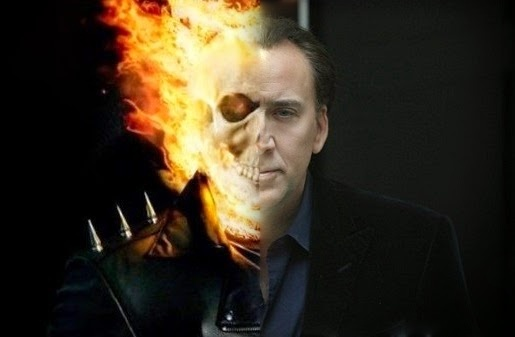

In [44]:
b

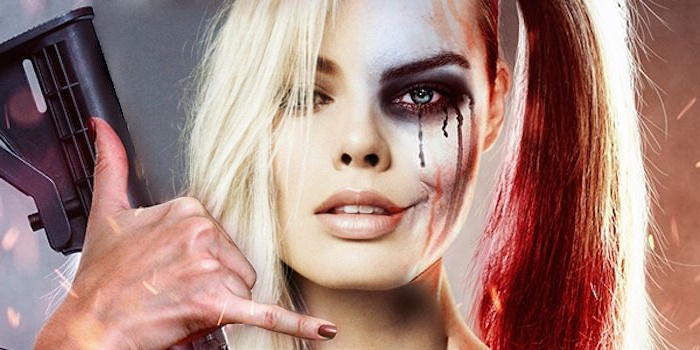

In [45]:
c

#Submission Instructions



1.   Complete all tasks above
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
4.   Upload the .ipynb file on Blackboard



##Rubric

*   (45 points) Implement Filtering Function
*   (15 points) Apply different filters to the above function
*   (50 points) Implement Blending Function
*   (15 points) Apply blending on different images